## Portfolio Analysis January 2026

I have 58,000 NOK in cash to invest and a clear thesis about where I want to be positioned. This notebook is an exercise where I figure out how to bet on high-conviction views without exposing myself to any more than a 35% drawdown.

## Investment Thesis

I'm building this portfolio around two core beliefs:

### DNB Teknologi A

I have deep trust in the DNB Teknologi fund managers, as they seem pragmatic, analytical, and genuinely long-term oriented. Their track record speaks for itself; this fund has consistently outperformed over decades, which is rare in active management. When I look at how they've navigated market cycles, rotated between sectors, and I have deep trust in the DNB Teknologi fund managers, as they seem pragmatic, analytical, and genuinely long-term oriented. Their track record speaks for itself; this fund has consistently outperformed over decades, which is rare in active management. When I look at how they've navigated market cycles, rotated between sectors, and managed risk through volatile periods, I see a team that understands both the quantitative and qualitative dimensions of investing.
managed risk through volatile periods, I see a team that understands both the quantitative and qualitative dimensions of investing.

Beyond the management, I believe technology and AI remain fundamentally undervalued relative to their transformative potential. This is a controversial view as many see current valuations as stretched—but I think the market is still underestimating how deeply AI will restructure productivity across every industry. We're in the early innings of a technological shift comparable to electrification or the internet, and the earnings growth that follows will justify current multiples and then some.

Importantly, DNB Teknologi is an internationally diversified fund, not a pure US tech play. If the United States enters a period of instability or relative decline, these fund managers will have repositioned long before I notice the headlines. That's the value of active management by people who are smarter and more informed than I am—they're paid to see around corners.

### China (JPM China Fund)

My conviction in China is rooted in a macro-historical framework, primarily influenced by Ray Dalio's books. I've read everything he's published: *Principles*, *Big Debt Crises*, and most importantly, *The Changing World Order*. His framework for understanding the rise and fall of empires over centuries seems undeniably true, and explains everything currently happening in the world. The patterns are remarkably consistent: rising powers accumulate productive capacity, education, trade dominance, and eventually reserve currency status, while declining powers experience debt crises, internal conflict, wealth inequality, and loss of global influence.

What struck me when I first read that book was how clearly the United States fit the pattern of a declining empire. Not in terminal collapse, but in the late stages of a long-term cycle. And since then, my predictions following the framework have largely played out: escalating political polarization, the rise of populist leaders, increasing civil unrest, eroding institutional trust and disregard for rules that were established a century ago.

Meanwhile, sentiment toward China has shifted exactly as anticipated. When I was first introduced to this framework, Western media was uniformly hostile towards China. The country was portrayed as an authoritarian threat with no redeeming qualities. Now I see more nuance entering the conversation. More people are traveling there, more investors are recognizing the value in Chinese equities after years of underperformance, and global perceptions are slowly rebalancing. The pendulum is swinging.

This is also a contrarian value play. Chinese equities have been crushed by the property crisis, regulatory crackdowns, COVID policy aftermath, and geopolitical tensions. Sentiment is near historic lows. But this to me seems precisely like the time to invest, when people only see the current crises and not the 10-year projected growth.

### A Critical Distinction

I want to be clear about something: I believe in US technology, especially in AI, but I do not believe in the United States as a whole. I wouldn't touch the american dollar or a long term bond with a 10 foot pole. These are separate bets. American tech companies are global enterprises with diversified revenue streams. They'll adapt regardless of what happens domestically. But the American political and economic system faces structural challenges that will likely intensify over the coming decade. My portfolio reflects this distinction.

## The Constraint

I want to make concentrated bets, but I'm not willing to accept unlimited downside. A 50% drawdown would be psychologically damaging and would take years to recover from mathematically. I can stomach a 30-35% drawdown. That's painful but survivable, and I could stay the course.

The question driving this analysis: **How do I size these positions to maximize exposure to my convictions while keeping max portfolio drawdown within my tolerance?**

## Current Portfolio (as of 09/01/26)

| Fund | Value (NOK) | % | Ticker |
|------|-------------|---|--------|
| DNB Teknologi A | 53,763 | 58.3% | 0P00000MVB.IR |
| DNB Global EM Indeks | 20,870 | 22.6% | 0P0001CTKY.IR |
| JPMorgan China | 15,576 | 16.9% | 0P0000MXQM.SI |
| DNB Norge A | 2,060 | 2.2% | 0P0001EFNB.IR |
| Total | 92269 | 100% | - |

In [2]:
%pip install yfinance pandas numpy matplotlib seaborn -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded!")

Libraries loaded!


## Fetch Historical Data

In [4]:
# Define funds with their tickers and current holdings
funds = {
    'DNB Teknologi': {'ticker': '0P00000MVB.IR', 'value': 53763},
    'DNB EM Indeks': {'ticker': '0P0001CTKY.IR', 'value': 20870},
    'JPM China': {'ticker': '0P0000MXQM.SI', 'value': 15576},
    'DNB Norge': {'ticker': '0P0001EFNB.IR', 'value': 2060},
}

start_date = '2018-04-01'
end_date = datetime.now().strftime('%Y-%m-%d')

fund_data = {}
for name, info in funds.items():
    print(f"Fetching {name}...")
    ticker = yf.Ticker(info['ticker'])
    hist = ticker.history(start=start_date, end=end_date)
    
    if len(hist) > 0:
        series = hist['Close'].copy()
        series.index = series.index.date
        fund_data[name] = series
        print(f"  ✅ {len(hist)} data points from {series.index[0]} to {series.index[-1]}")
    else:
        print(f"  ❌ No data found")

prices = pd.DataFrame(fund_data)
prices.index = pd.to_datetime(prices.index)
print(f"\nCombined DataFrame shape: {prices.shape}")

Fetching DNB Teknologi...
  ✅ 916 data points from 2022-03-07 to 2026-01-08
Fetching DNB EM Indeks...
  ✅ 905 data points from 2022-03-07 to 2026-01-08
Fetching JPM China...
  ✅ 823 data points from 2022-03-07 to 2026-01-08
Fetching DNB Norge...
  ✅ 947 data points from 2022-03-07 to 2026-01-08

Combined DataFrame shape: (969, 4)


In [5]:
# Clean data: forward-fill gaps, drop remaining NaN
prices_clean = prices.ffill().dropna()
print(f"Clean dataset: {len(prices_clean)} trading days")
print(f"Date range: {prices_clean.index[0].strftime('%Y-%m-%d')} to {prices_clean.index[-1].strftime('%Y-%m-%d')}")

Clean dataset: 969 trading days
Date range: 2022-03-07 to 2026-01-08


## Risk Analysis: Correlation & Drawdown

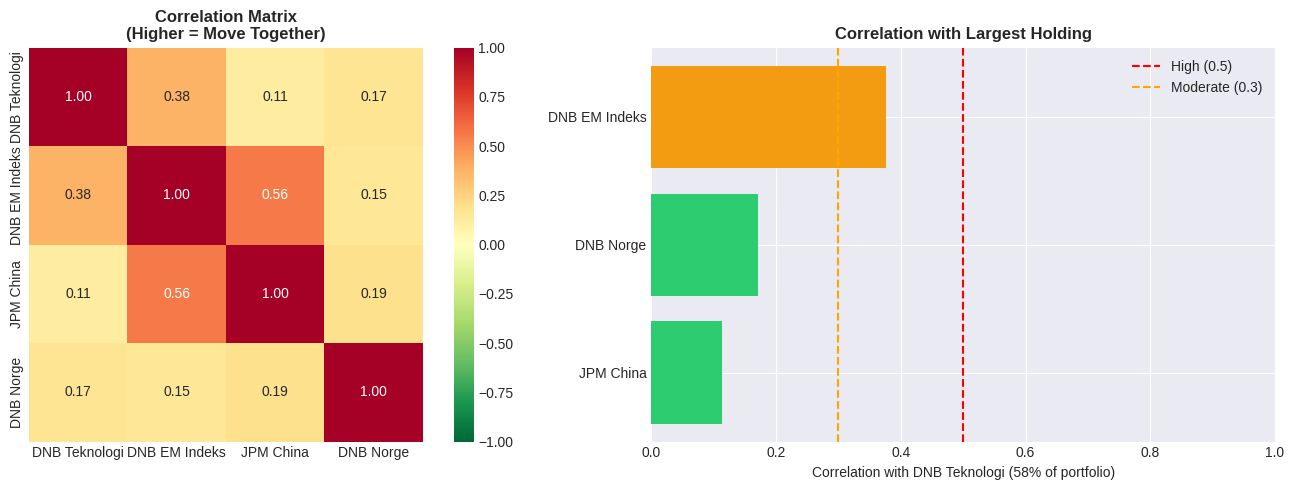

In [6]:
# Setup weights and returns
total_value = sum(info['value'] for info in funds.values())
weights = {name: info['value'] / total_value for name, info in funds.items()}
returns = prices_clean.pct_change().dropna()

# Correlation Matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

corr = returns.corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn_r', center=0, vmin=-1, vmax=1, 
            ax=axes[0], fmt='.2f', square=True)
axes[0].set_title('Correlation Matrix\n(Higher = Move Together)', fontweight='bold')

# Correlation with largest holding
tech_corr = corr['DNB Teknologi'].drop('DNB Teknologi').sort_values()
colors = ['#e74c3c' if x > 0.5 else '#f39c12' if x > 0.3 else '#2ecc71' for x in tech_corr]
axes[1].barh(tech_corr.index, tech_corr.values, color=colors)
axes[1].axvline(x=0.5, color='red', linestyle='--', label='High (0.5)')
axes[1].axvline(x=0.3, color='orange', linestyle='--', label='Moderate (0.3)')
axes[1].set_xlabel('Correlation with DNB Teknologi (58% of portfolio)')
axes[1].set_title('Correlation with Largest Holding', fontweight='bold')
axes[1].legend()
axes[1].set_xlim(0, 1)

plt.tight_layout()
plt.show()

### Key Findings

**Correlation with DNB Teknologi:**
The assets are surprisingly uncorrelated with DNB Teknologi, which is good since it'll remain my largest holding at >50%. Emerging Markets is the most correlated at 0.38, while China is the least correlated at just 0.11.

**China & Emerging Markets overlap:**
China and EM are quite correlated at 0.56, which is expected since China makes up a significant portion of most EM indices. I won't invest in both EM and China as if they're independent diversifiers. They have substantial overlap and should be considered part of the same exposure. Maybe there exists some EM fund ex China?? this would be better as I have more control over position sizing.

## Risk analysis: Max drawdowns

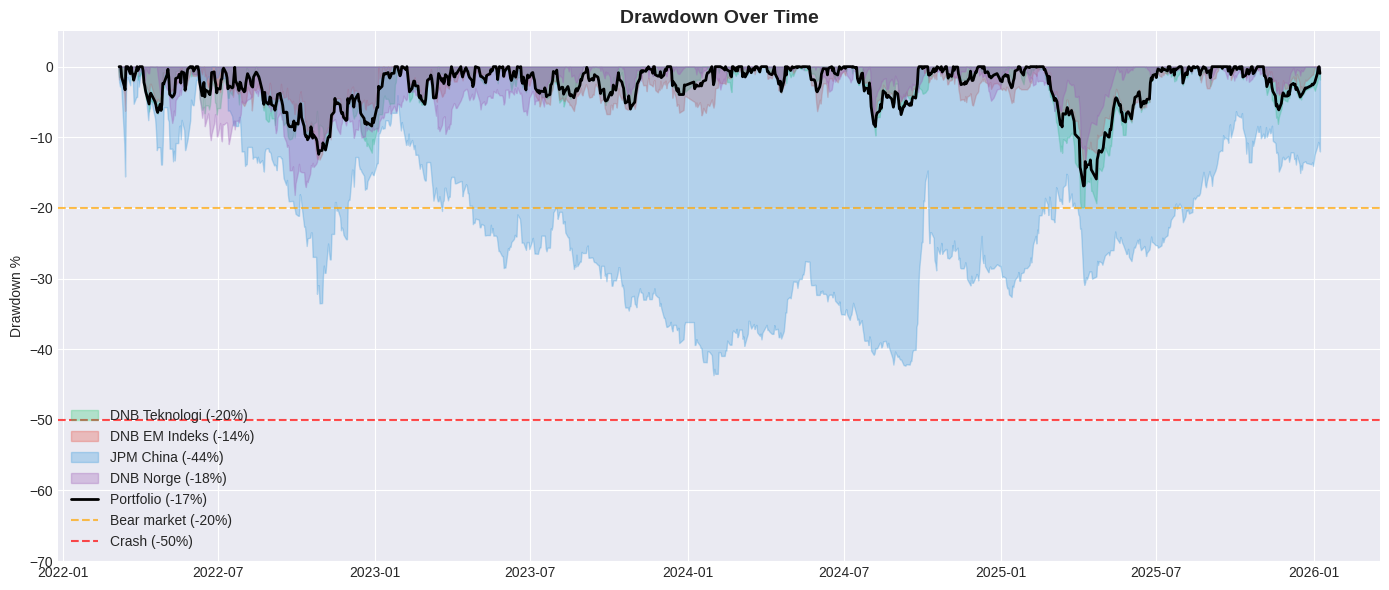

In [7]:
# Drawdown Analysis
normalized = (prices_clean / prices_clean.iloc[0]) * 100

def calc_drawdown_series(series):
    cummax = series.cummax()
    return (series - cummax) / cummax * 100

weights_array = np.array([weights[col] for col in returns.columns])
portfolio_returns = (returns * weights_array).sum(axis=1)
portfolio_value = (1 + portfolio_returns).cumprod() * 100

fig, ax = plt.subplots(figsize=(14, 6))

colors = {'DNB Teknologi': '#2ecc71', 'DNB EM Indeks': '#e74c3c', 
          'JPM China': '#3498db', 'DNB Norge': '#9b59b6'}

for col in normalized.columns:
    dd = calc_drawdown_series(normalized[col])
    ax.fill_between(dd.index, dd, 0, alpha=0.3, label=f'{col} ({dd.min():.0f}%)', color=colors[col])

portfolio_dd = calc_drawdown_series(portfolio_value)
ax.plot(portfolio_dd.index, portfolio_dd, color='black', linewidth=2, label=f'Portfolio ({portfolio_dd.min():.0f}%)')

ax.axhline(y=-20, color='orange', linestyle='--', alpha=0.7, label='Bear market (-20%)')
ax.axhline(y=-50, color='red', linestyle='--', alpha=0.7, label='Crash (-50%)')
ax.set_title('Drawdown Over Time', fontsize=14, fontweight='bold')
ax.set_ylabel('Drawdown %')
ax.legend(loc='lower left')
ax.set_ylim(-70, 5)
plt.tight_layout()
plt.show()

## Key Findings

**Max Drawdown & Volatility:**
China is extremely volatile. Most of the movement in the drawdown graph comes from China alone, with a max drawdown above 40% between 2022–2026. This is significant risk, even though I still believe in this fund long term. I see that China needs to be weighted a bit more carefully so its contribution to overall portfolio risk is more similar to DNB Teknologi, but I suspect that since DNB teknologi has a roughly 3.5x position size, the risk is somewhat similar. Let me test this out

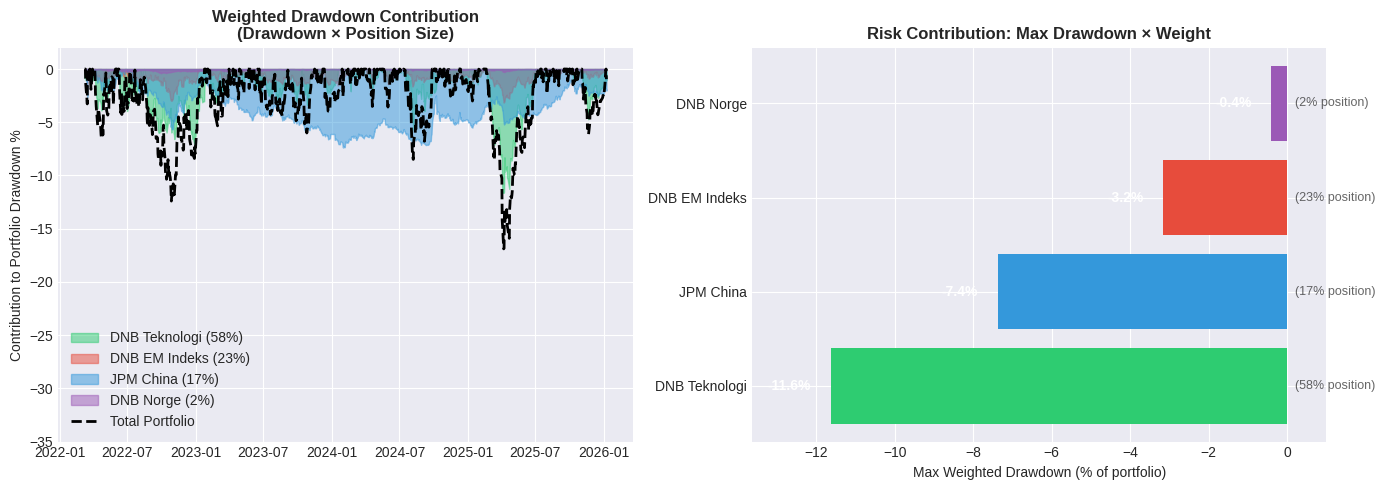

In [9]:
# Weighted Drawdown: contribution to portfolio risk by position size
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Stacked weighted drawdown over time
for col in normalized.columns:
    dd = calc_drawdown_series(normalized[col])
    weighted_dd = dd * weights[col]
    axes[0].fill_between(dd.index, weighted_dd, 0, alpha=0.5, label=f'{col} ({weights[col]*100:.0f}%)', color=colors[col])

axes[0].plot(portfolio_dd.index, portfolio_dd, color='black', linewidth=2, linestyle='--', label='Total Portfolio')
axes[0].set_title('Weighted Drawdown Contribution\n(Drawdown × Position Size)', fontweight='bold')
axes[0].set_ylabel('Contribution to Portfolio Drawdown %')
axes[0].legend(loc='lower left')
axes[0].set_ylim(-35, 2)

# Right: Bar chart of max weighted drawdown per fund
max_weighted_dd = {}
for col in normalized.columns:
    dd = calc_drawdown_series(normalized[col])
    max_weighted_dd[col] = dd.min() * weights[col]

funds_sorted = sorted(max_weighted_dd.keys(), key=lambda x: max_weighted_dd[x])
values = [max_weighted_dd[f] for f in funds_sorted]
bar_colors = [colors[f] for f in funds_sorted]

bars = axes[1].barh(funds_sorted, values, color=bar_colors)
axes[1].set_xlabel('Max Weighted Drawdown (% of portfolio)')
axes[1].set_title('Risk Contribution: Max Drawdown × Weight', fontweight='bold')

# Add value labels
for bar, val, fund in zip(bars, values, funds_sorted):
    weight_pct = weights[fund] * 100
    axes[1].text(val - 0.5, bar.get_y() + bar.get_height()/2, 
                f'{val:.1f}%', va='center', ha='right', fontweight='bold', color='white')
    axes[1].text(0.2, bar.get_y() + bar.get_height()/2, 
                f'({weight_pct:.0f}% position)', va='center', ha='left', fontsize=9, alpha=0.7)

axes[1].set_xlim(min(values) - 2, 1)
plt.tight_layout()
plt.show()

### Key Findings

As suspected, DNB Teknologi contributes more weighted drawdown (-11.6%) than JPM China (-7.4%). But I need to be careful interpreting this. The 2022–2026 period is very biased:

**Tech had an exceptional run:**
Western tech didn't go through a major crash in this period. The early 2022 rate-hike dip was minor, and then the AI boom (ChatGPT, Nvidia, etc.) drove massive gains. DNB Teknologi's 20% max drawdown is likely close to its *best-case* scenario, not typical.

**China had a perfect storm of crises:**
- Property sector collapse (Evergrande, Country Garden)
- Prolonged zero-COVID lockdowns
- Regulatory crackdowns on tech giants
- Geopolitical tensions with the West

China's 44% drawdown is probably close to its *worst-case* scenario. This was an unusually brutal period for Chinese equities.

**Implication:**
I've essentially stress-tested China while seeing Tech at near-minimum pain. If anything, this suggests I could reasonably *increase* China exposure. I've already lived through one of its worst periods, and the weighted risk contribution is still lower than Teknologi. The valuation case for China is also more compelling after this drawdown.